In [38]:
import os
os.sys.path

['C:\\Users\\oscar_5lhb1c8',
 'C:\\Users\\oscar_5lhb1c8\\.conda\\envs\\Graphviz\\python310.zip',
 'C:\\Users\\oscar_5lhb1c8\\.conda\\envs\\Graphviz\\DLLs',
 'C:\\Users\\oscar_5lhb1c8\\.conda\\envs\\Graphviz\\lib',
 'C:\\Users\\oscar_5lhb1c8\\.conda\\envs\\Graphviz',
 '',
 'C:\\Users\\oscar_5lhb1c8\\AppData\\Roaming\\Python\\Python310\\site-packages',
 'C:\\Users\\oscar_5lhb1c8\\.conda\\envs\\Graphviz\\lib\\site-packages',
 'C:\\Users\\oscar_5lhb1c8\\.conda\\envs\\Graphviz\\lib\\site-packages\\win32',
 'C:\\Users\\oscar_5lhb1c8\\.conda\\envs\\Graphviz\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\oscar_5lhb1c8\\.conda\\envs\\Graphviz\\lib\\site-packages\\Pythonwin',
 '/User/prajendr/anaconda3/envs/cvpy39/lib/python3.9/site-packages/',
 '/User/prajendr/anaconda3/envs/cvpy39/lib/python3.9/site-packages/',
 '/User/prajendr/anaconda3/envs/cvpy39/lib/python3.9/site-packages/',
 '/User/prajendr/anaconda3/envs/cvpy39/lib/python3.9/site-packages/']

In [39]:
import sys
path_to_module = "/User/prajendr/anaconda3/envs/cvpy39/lib/python3.9/site-packages/"
sys.path.append(path_to_module)
import cv2

In [40]:
!pip install matplotlib

In [41]:
import numpy as np
import cv2
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
plt.style.use('ggplot')

In [43]:
from sklearn.datasets import load_iris

iris = load_iris()
iris
#This will return the dictionary which contains  bunch of different fields

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [44]:
dir(iris) #Here all the data points are contained in 'data'
# There are 150 data points, each of which have four
# feature values

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [45]:
iris.data.shape

(150, 4)

In [46]:
iris.feature_names #these are the feature values

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [47]:
iris.target.shape

(150,)

In [48]:
np.unique(iris.target) # We can also inspect the class labels, # and find that there is a total of 3 classes

array([0, 1, 2])

In [49]:
# for the sake of simplicity, we want to focus on a binary
# classification problem for now, where we only have two clases.
#The easiest way to do this is to discard all data points

#belonging to a certain class, such as class label 2,
#by selecting all
#the rows that do not belong to class 2:

idx = iris.target !=2
data = iris.data[idx].astype(np.float32)
target = iris.target[idx].astype(np.float32)

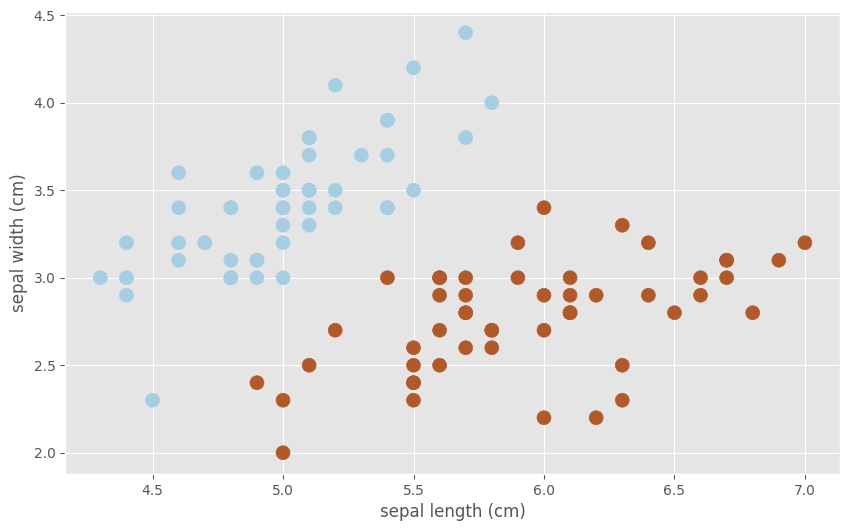

In [50]:
#Using Matplotlib, we create a scatter plot where the color of each data point corresponds to the class label.
# To make plotting easier, we limit ourselves to the first two features (iris,feature_names[0] being the sepal
# length and iris.feature_names[1] being sepal width)
# we can see a nice sepration of classes in the following figure

plt.figure(figsize=(10,6))
plt.scatter(data[:,0], data[:,1], c=target, cmap=plt.cm.Paired, s=100)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

In [51]:
#splitting our data set into training and etsting assigning the test size as a given (10 percent for 
# training and the rest for testing)

X_train, X_test, y_train, y_test=model_selection.train_test_split(data,target, test_size=0.1, random_state=42)

Here we want to split the data 90 percent training data and 10 percent test data, which we specify with test_size=0.1. By inspecting the return arguments, we note that we ended up with exactly 90n training points and 10 test data points:

In [52]:
X_train.shape, y_train.shape

((90, 4), (90,))

In [53]:
X_test.shape, y_test.shape

((10, 4), (10,))

In [54]:
# training the classifier
lr=cv2.ml.LogisticRegression_create() # Logistic regressiion

In [55]:
#We then have to specify the desired training method.
# Here, we can choose cv2.ml.LogisticRegression_BATCH or cv2.ml.LogisticRegression_MINI_BATCH. For now all we need
# to know is that we want to update the model every data point, which can be achieved with the following code:

lr.setTrainMethod(cv2.ml.LogisticRegression_MINI_BATCH)
lr.setMiniBatchSize(1)

In [56]:
lr.setIterations(100)

In [57]:
lr.train(X_train, cv2.ml.ROW_SAMPLE, y_train); #training phase completed

In [58]:
lr.get_learnt_thetas()

array([[-0.04090133, -0.01910263, -0.16340333,  0.28743777,  0.11909772]],
      dtype=float32)

In [59]:
#testing the classifier
ret, y_pred=lr.predict(X_train) #testing completed

In [60]:
metrics.accuracy_score(y_train, y_pred)

1.0

Perfect score! However, this only means that the model was able to perfectly memorize the training dataset. This does not mean that the model would be able to classify a new, unseen data point. for this we need to check the test dataset:

In [61]:
ret, y_pred=lr.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

1.0

# Logistic Regression Model Section:
# Scatter Plot:

The scatter plot visually represents the distribution of data points in the Iris dataset based on the first two features (sepal length and sepal width).
Each point is colored according to its class label (0, 1) after excluding class label 2.
Logistic Regression Training:

The logistic regression model is trained on the filtered dataset.
The learned parameters (theta values) are obtained using lr.get_learnt_thetas(). These are the coefficients of the logistic regression model that were adjusted during the training process.
The model is trained using mini-batch gradient descent with 100 iterations.
Logistic Regression Testing:

The trained logistic regression model is tested on both the training (X_train) and testing (X_test) datasets.
The lr.predict() function is used to obtain predictions on both datasets.
The accuracy scores are computed using metrics.accuracy_score from scikit-learn, providing a measure of how well the model performs on the training and testing datasets.

Perfect score again

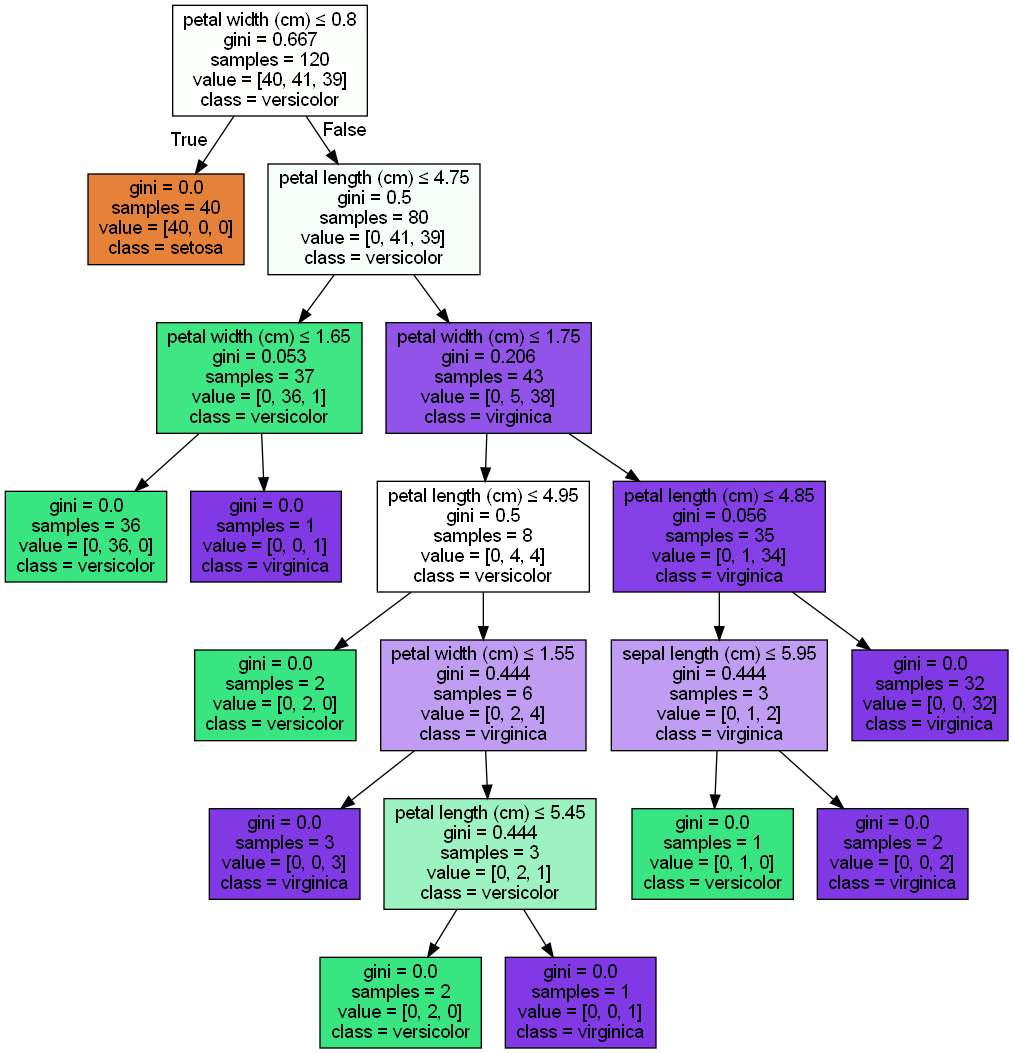

In [62]:
from io import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydot
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Load a dataset for example purposes
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
dtc = DecisionTreeClassifier()

# Fit the model to the training data
dtc.fit(X_train, y_train)

# Visualize the decision tree
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, special_characters=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]

# Instead of graph.create_png(), use the write_png method
png_bytes = graph.create_png()
Image(png_bytes)

# The data used in this code comes from the famous Iris dataset, a classic dataset in machine learning and statistics. 
# It was introduced by the British biologist and statistician Ronald A. Fisher in 1936. 
# The dataset consists of 150 samples of iris flowers, each belonging to one of three species: setosa, versicolor, or virginica.
Each sample has four features (attributes):

1. **Sepal Length (cm):** Length of the iris flower's sepal (the outermost part of the flower).

2. **Sepal Width (cm):** Width of the iris flower's sepal.


The target variable is the species of the iris flower, represented numerically: 0 for setosa, 1 for versicolor, and 2 for virginica. But I focus on only 2 of them which is versicolor and virginicia.

# In the provided code, the following steps are taken:

1. The dataset is loaded using `load_iris()` from scikit-learn.
2. Class label 2 (representing virginica) is filtered out, creating a binary classification problem by focusing only on setosa (0) and versicolor (1).
3. The filtered dataset is visualized in a scatter plot where the x-axis represents the sepal length, the y-axis represents the sepal width, and the color of each point represents its class label.
4. The logistic regression model and the decision tree model are trained and tested on the modified dataset.

The goal of this demonstration is likely to showcase the steps involved in binary classification using logistic regression, evaluate the performance of the model, and visually inspect the decision-making process of a decision tree.